Mean Age: 43.125 Median Age: 43.0 Mode Age: 25
Glucose Range: 95


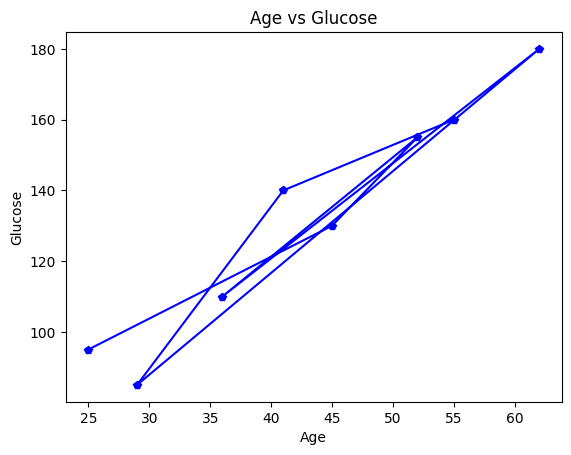

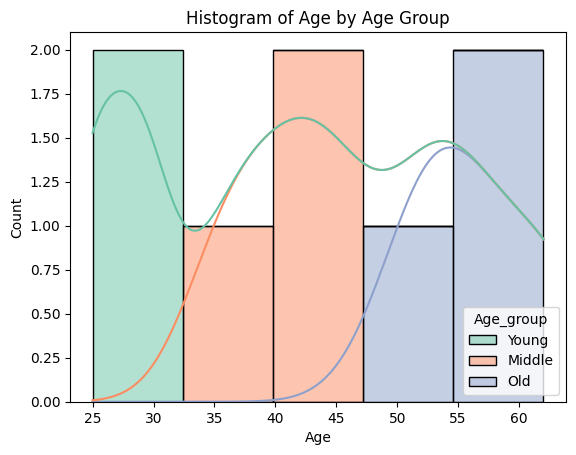

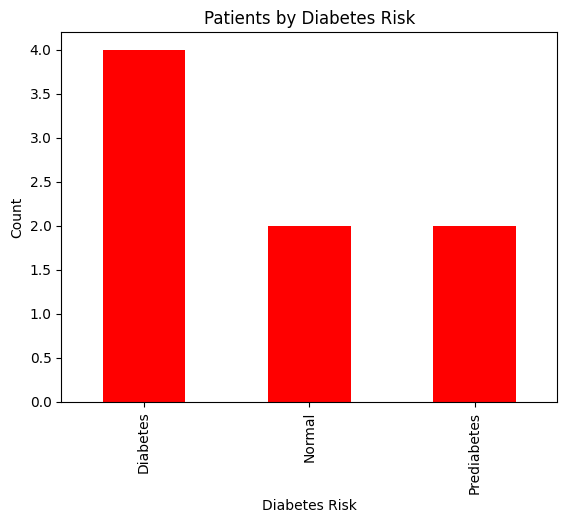

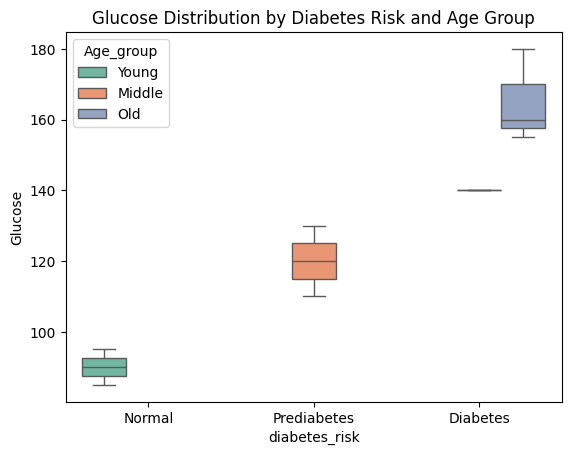


Final DataFrame:
  Patient  Age  Glucose diabetes_risk  Weight  Height bmi_category Age_group
0      P1   25       95        Normal      60    1.65       Normal     Young
1      P2   45      130   Prediabetes      82    1.75   Overweight    Middle
2      P3   52      155      Diabetes      90    1.80   Overweight       Old
3      P4   36      110   Prediabetes      70    1.72       Normal    Middle
4      P5   62      180      Diabetes      75    1.70   Overweight       Old
5      P6   29       85        Normal      65    1.60   Overweight     Young
6      P7   41      140      Diabetes      85    1.78   Overweight    Middle
7      P8   55      160      Diabetes      95    1.68        Obese       Old


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Patient data
# ------------------------------
data = pd.DataFrame({
    "Patient": ["P1","P2","P3","P4","P5","P6","P7","P8"],
    "Age": [25, 45, 52, 36, 62, 29, 41, 55],
    "Glucose": [95, 130, 155, 110, 180, 85, 140, 160],
    "Weight": [60, 82, 90, 70, 75, 65, 85, 95],
    "Height": [1.65, 1.75, 1.80, 1.72, 1.70, 1.60, 1.78, 1.68]
})

# ------------------------------
# Diabetes risk using NumPy
# ------------------------------
glucose = data['Glucose'].to_numpy()
data['diabetes_risk'] = np.where(glucose < 100, "Normal",
                          np.where(glucose <= 139, "Prediabetes", "Diabetes"))

# ------------------------------
# BMI calculation and category
# ------------------------------
weight = data['Weight'].to_numpy()
height = data['Height'].to_numpy()
bmi = weight / (height ** 2)

data['bmi_category'] = np.where(bmi < 18.5, "Underweight",
                        np.where(bmi <= 24.9, "Normal",
                        np.where(bmi <= 29.9, "Overweight", "Obese")))

# ------------------------------
# Basic statistics
# ------------------------------
mean_age = np.mean(data['Age'])
median_age = np.median(data['Age'])
mode_age = data['Age'].mode()[0]
range_glucose = np.max(data['Glucose']) - np.min(data['Glucose'])

print("Mean Age:", mean_age, "Median Age:", median_age, "Mode Age:", mode_age)
print("Glucose Range:", range_glucose)

# ------------------------------
# Age group categories
# ------------------------------
data['Age_group'] = np.where(
    (data['Age'] >= 18) & (data['Age'] <= 29), "Young",
    np.where((data['Age'] >= 30) & (data['Age'] <= 50), "Middle", "Old")
)

# ------------------------------
# Line plot: Age vs Glucose
# ------------------------------
plt.plot(data['Age'], data['Glucose'], marker='p', color='blue')
plt.title("Age vs Glucose")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.show()

# ------------------------------
# Histogram: Age by Age Group
# ------------------------------
sns.histplot(
    data=data,
    x='Age',
    hue='Age_group',
    bins=5,
    kde=True,
    palette='Set2',
    multiple="stack"
)
plt.title("Histogram of Age by Age Group")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# ------------------------------
# Bar chart: Patients by Diabetes Risk
# ------------------------------
data['diabetes_risk'].value_counts().plot(kind='bar', color='red')
plt.title("Patients by Diabetes Risk")
plt.xlabel("Diabetes Risk")
plt.ylabel("Count")
plt.show()

# ------------------------------
# Box plot: Glucose by Diabetes Risk and Age Group
# ------------------------------
sns.boxplot(x="diabetes_risk", y="Glucose", hue="Age_group", data=data, palette="Set2")
plt.title("Glucose Distribution by Diabetes Risk and Age Group")
plt.show()

# ------------------------------
# Final DataFrame
# ------------------------------
print("\nFinal DataFrame:")
print(data[['Patient','Age','Glucose','diabetes_risk','Weight','Height','bmi_category','Age_group']])
